<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Mobile Device Usage & Battery Draining</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [3]:
numeric_columns = df.select_dtypes(include='int64').columns
numeric_columns

Index(['User ID', 'App Usage Time (min/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age',
       'User Behavior Class'],
      dtype='object')

In [4]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

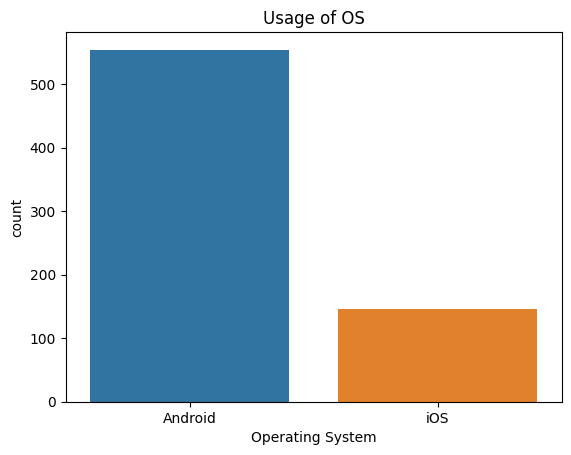

In [5]:
sns.countplot(x=df['Operating System'])
plt.xlabel("Operating System")
plt.title("Usage of OS")
plt.show()

<Axes: xlabel='User Behavior Class', ylabel='count'>

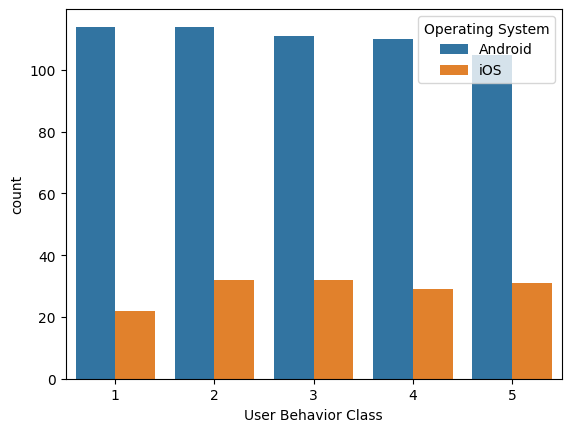

In [6]:
sns.countplot(x=df['User Behavior Class'],hue=df['Operating System'])

<Axes: xlabel='User Behavior Class', ylabel='count'>

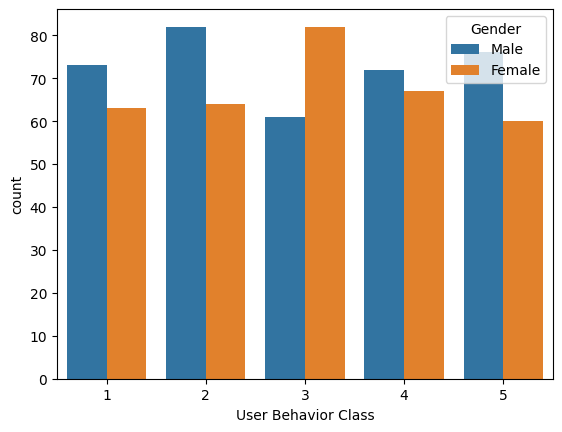

In [7]:
sns.countplot(x=df['User Behavior Class'],hue=df['Gender'])

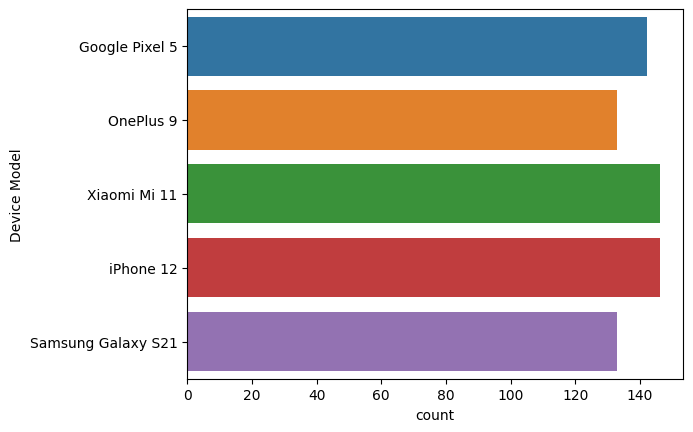

In [8]:
sns.countplot(y=df['Device Model'])
plt.show()

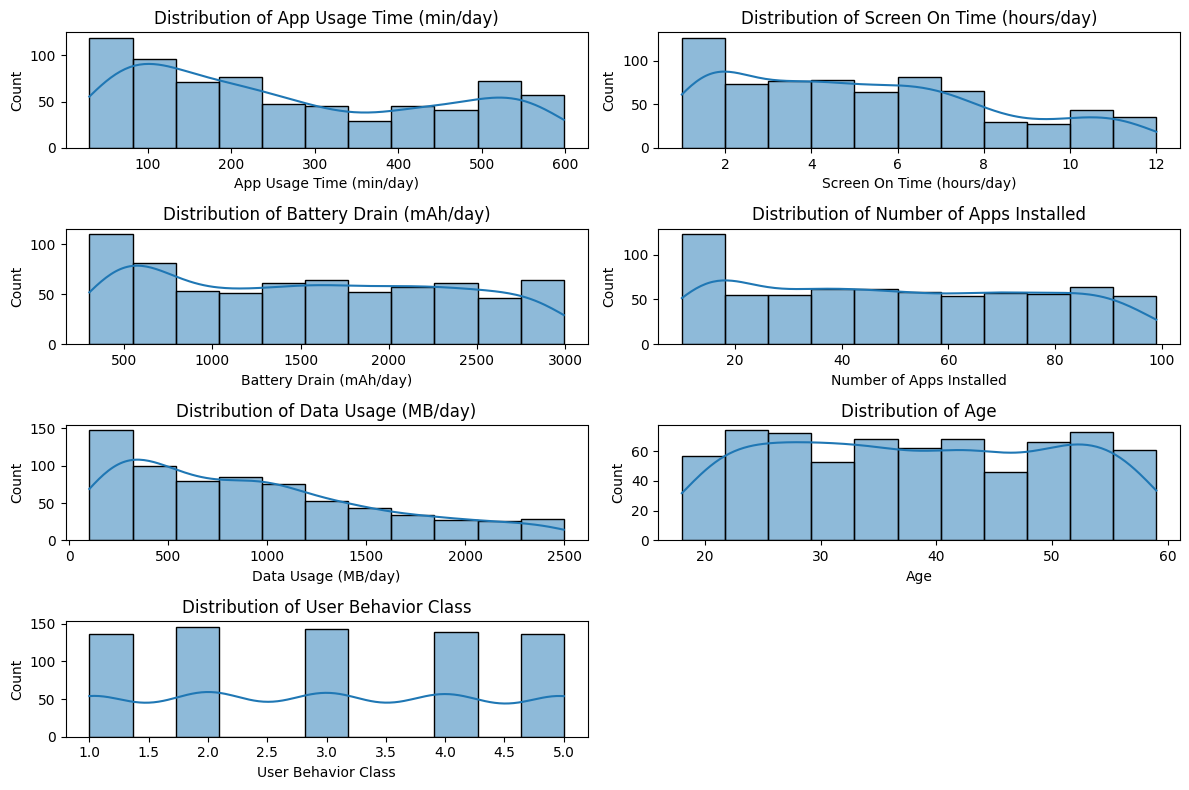

In [9]:
plt.figure(figsize=(12,8))
i = 0
def hist_plot(col):
    global i
    i+=1
    plt.subplot(4,2,i)
    sns.histplot(x=df[col],kde= True)
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

numeric_columns = [ 'App Usage Time (min/day)','Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age',
       'User Behavior Class']
for col in numeric_columns:
    hist_plot(col)